In [342]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("data.csv")
trial_schedule = pd.read_csv("trial-schedule.csv")

n_baseline = int(trial_schedule["n_baseline"].loc[0])
n_exposure = int(trial_schedule["n_exposure"].loc[0])

df.head()

,Trial,Mouse X,Mouse Y,Cursor X,Cursor Y,Rotation
0,0,5.0,-2.0,5.0,-2.0,0.0
1,0,5.0,-2.0,5.0,-2.0,0.0
2,0,5.0,-2.0,5.0,-2.0,0.0
3,0,5.0,-2.0,5.0,-2.0,0.0
4,0,5.0,-2.0,5.0,-2.0,0.0


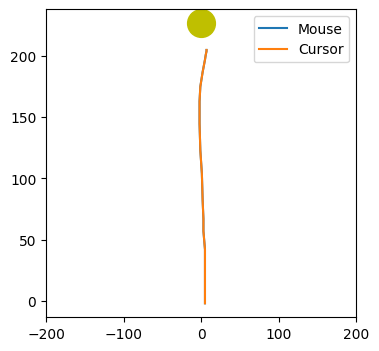

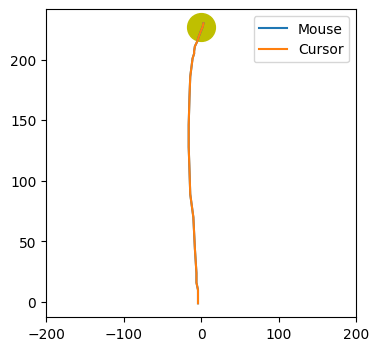

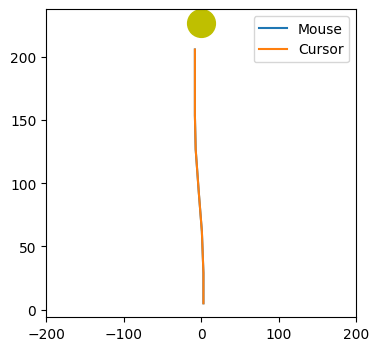

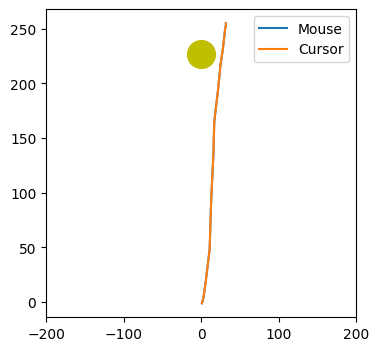

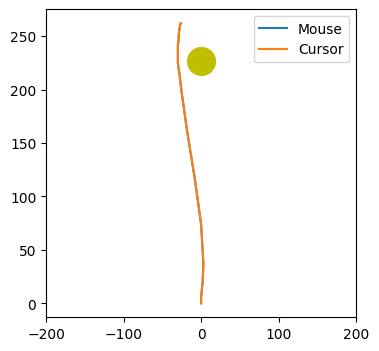

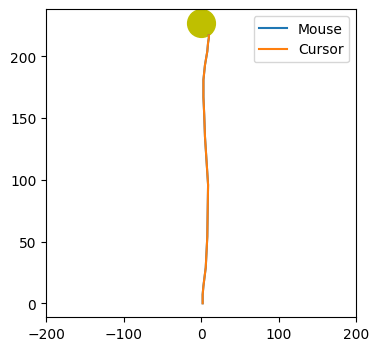

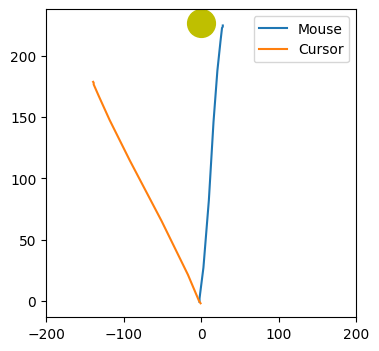

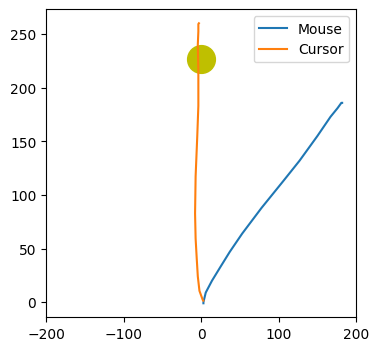

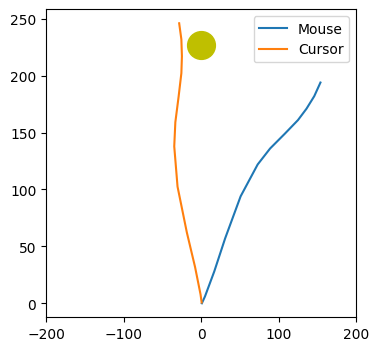

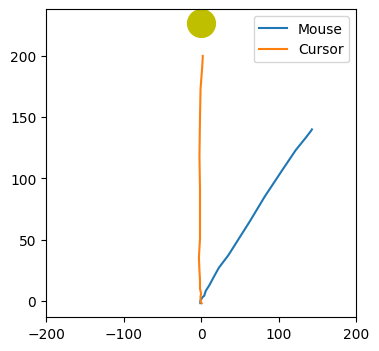

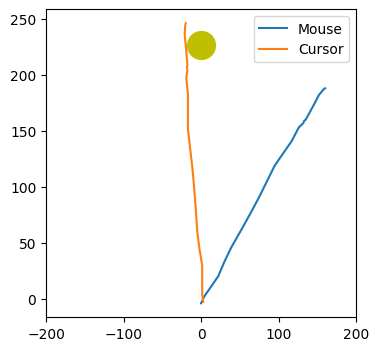

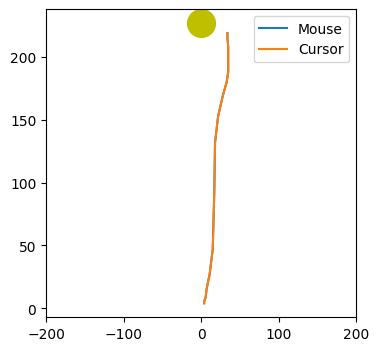

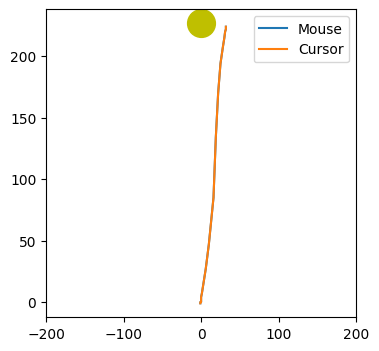

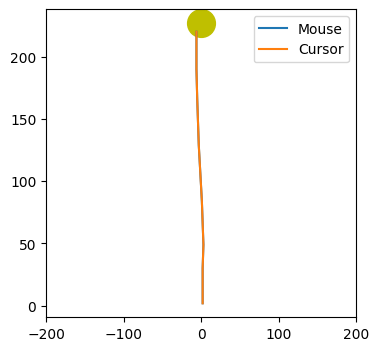

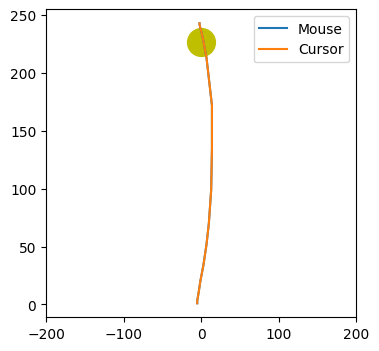

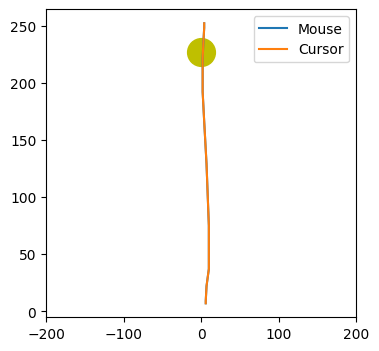

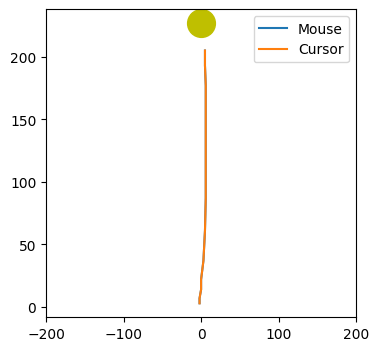

In [344]:
import matplotlib.pyplot as plt

target_loc_x, target_loc_y = (0, 3.78*60)

trial_min = 0
trial_max = 500
df_head = df[df["Trial"].between(trial_min, trial_max)]


for trial, trial_data in df_head.groupby("Trial"):
    plt.figure(figsize=(4, 4))
    plt.plot(trial_data["Mouse X"], trial_data["Mouse Y"], label=f"Mouse")
    plt.plot(trial_data["Cursor X"], trial_data["Cursor Y"], label=f"Cursor")
    plt.scatter(target_loc_x, target_loc_y, s=400, color='y')

    plt.xlim([-200, 200])
    plt.legend()
    plt.show()



In [345]:
# Compute start and end positions for each trial
tError = df.groupby("Trial")[["Cursor X", "Cursor Y"]].agg(["first", "last"])

# Compute displacement
tError["Delta X"] = tError[("Cursor X", "last")] - tError[("Cursor X", "first")]
tError["Delta Y"] = tError[("Cursor Y", "last")] - tError[("Cursor Y", "first")]

tError["Angle Radians"] = -np.arctan2(tError["Delta X"], tError["Delta Y"])  # atan2(x, y)
tError["Angle Degrees"] = np.degrees(tError["Angle Radians"])

tError["Rotation"] = np.rad2deg(df.groupby("Trial")["Rotation"].first())

tError.head()

Cursor X       Cursor Y        Delta X Delta Y Angle Radians  \
         first  last    first   last                                 
Trial                                                                
0          5.0   7.0     -2.0  205.0     2.0   207.0     -0.009662   
1         -4.0   3.0     -1.0  230.0     7.0   231.0     -0.030294   
2          3.0  -8.0      5.0  206.0   -11.0   201.0      0.054672   
3          1.0  32.0     -1.0  255.0    31.0   256.0     -0.120507   
4          0.0 -26.0      0.0  262.0   -26.0   262.0      0.098913   

      Angle Degrees Rotation  
                              
Trial                         
0         -0.553565      0.0  
1         -1.735705      0.0  
2          3.132465      0.0  
3         -6.904543      0.0  
4          5.667286      0.0

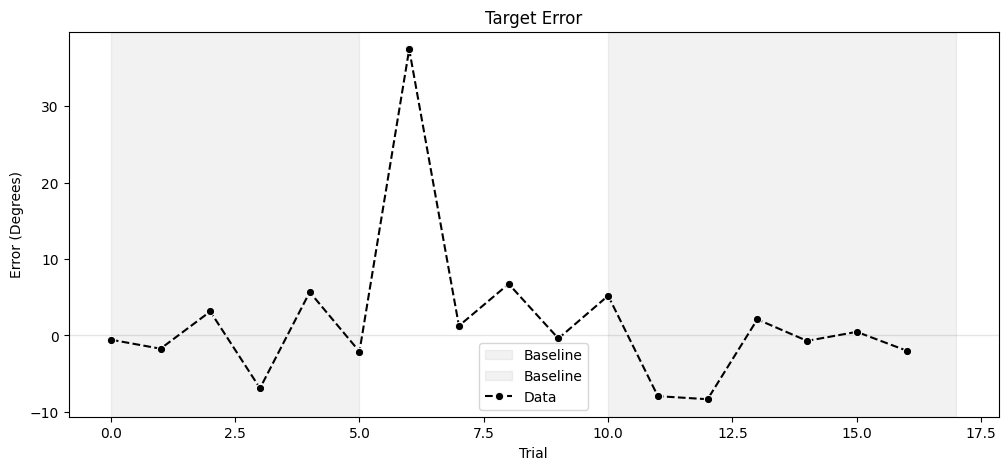

In [346]:
plt.figure(figsize=(12,5))
plt.axvspan(0, n_baseline, color="gray", alpha=0.1, label="Baseline")
plt.axvspan(n_baseline + n_exposure, len(df.groupby("Trial")), color="gray", alpha=0.1, label="Baseline")
plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.1)

sns.lineplot(
    data=tError,
    x="Trial",
    y="Angle Degrees",
    label='Data',
    ls='--',
    marker='o',
    color='k'
)
#plt.xticks(df_grouped.index, rotation=0);
plt.ylabel("Error (Degrees)")
plt.title("Target Error")
plt.legend(frameon=True)
plt.show()

In [347]:
# Run once please
start_positions = df.groupby("Trial")[["Cursor X", "Cursor Y"]].first().rename(columns={"Cursor X": "Cursor X_Start", "Cursor Y": "Cursor Y_Start"})
df = df.merge(start_positions, on="Trial")


In [348]:
df["Distance"] = np.sqrt((df["Cursor X"] - df["Cursor X_Start"])**2 + (df["Cursor Y"] - df["Cursor Y_Start"])**2)

hError = df[df["Distance"] > 40].groupby("Trial").first().reset_index()
hError = hError[["Trial", "Cursor X", "Cursor Y", "Distance"]]
hError.head()

,Trial,Cursor X,Cursor Y,Distance
0,0,5.0,42.0,44.000000
1,1,-8.0,44.0,45.177428
2,2,1.0,62.0,57.035077
3,3,11.0,48.0,50.009999
4,4,0.0,74.0,74.000000


In [349]:
hError[['Start Pos X', "Start Pos Y"]] = start_positions

hError["Delta X"] = hError["Cursor X"] - hError["Start Pos X"]
hError["Delta Y"] = hError["Cursor Y"] - hError["Start Pos Y"]

hError["Angle Radians"] = -np.arctan2(hError["Delta X"], hError["Delta Y"])  # atan2(x, y)
hError["Angle Degrees"] = np.degrees(hError["Angle Radians"])

hError["Rotation"] = np.rad2deg(df.groupby("Trial")["Rotation"].first())

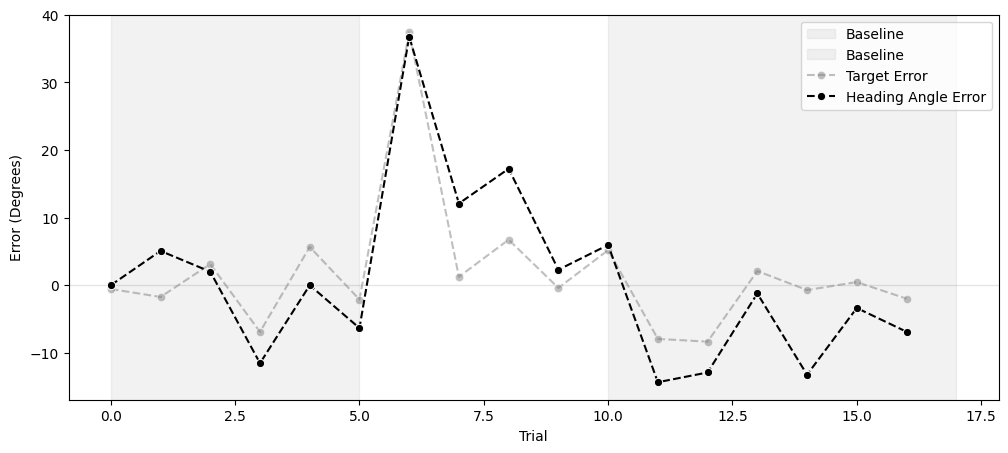

In [350]:
plt.figure(figsize=(12,5))
plt.axvspan(0, n_baseline, color="gray", alpha=0.1, label="Baseline")
plt.axvspan(n_baseline + n_exposure, len(df.groupby("Trial")), color="gray", alpha=0.1, label="Baseline")
plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.1)

sns.lineplot(
    data=tError,
    x="Trial",
    y="Angle Degrees",
    label='Target Error',
    ls='--',
    marker='o',
    color='gray',
    alpha=0.5
)

sns.lineplot(
    data=hError,
    x="Trial",
    y="Angle Degrees",
    label='Heading Angle Error',
    ls='--',
    marker='o',
    color='k'
)

#plt.xticks(df_grouped.index, rotation=0);
plt.ylabel("Error (Degrees)")
# plt.title("Target Error")
plt.legend(frameon=True)
plt.show()

<Axes: xlabel='Trial'>

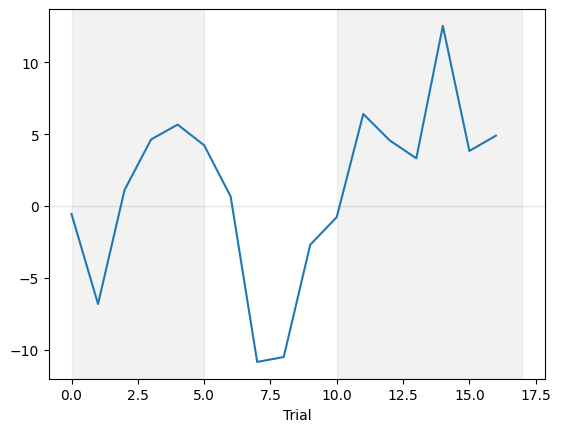

In [351]:
diff = tError["Angle Degrees"] - hError["Angle Degrees"]

plt.axvspan(0, n_baseline, color="gray", alpha=0.1, label="Baseline")
plt.axvspan(n_baseline + n_exposure, len(df.groupby("Trial")), color="gray", alpha=0.1, label="Baseline");
plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.1)

diff.plot()